In [ ]:
from google.colab import files

uploaded = files.upload()

Saving memo_dataset7.csv to memo_dataset7.csv


In [ ]:
! pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 22.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import kagglehub
import seaborn as sns
from scipy import signal
from dateutil.parser import parse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from google.colab import drive

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('memo_dataset7.csv')

columns = df.columns.tolist()
new_order = [columns[9]] + columns[:9] + columns[9:]
df = df[new_order]
df = df.loc[:, ~df.columns.duplicated()]
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,Day sin,Day cos,Year sin,Year cos,Import,Export,ae,tgp,tpp,cpie,hpp,spp,wpp,bp,tnp,tpp 2,cpie 2,hpp 2,spp 2,wpp 2,bp 2,tnp 2,dl,afc_x,fhc,Import natural gas,sb,tqe,efet,pbcpw,ltd,afc_y,Import mg,ib_mg,export_mg,ter_mg,Import kjf,ib_kjf,export_kjf,ter_kjf,Import dt,ib_dt,export_dt,ter_dt,hour,dayofweek,quarter,month,year,dayofyear,Trend,Seasonal,Residual,MCV_lag1,MCV_lag2,MCP_lag1,MCP_lag2,MCP_lag3
0,54.998618,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,7.624173e-12,-1.000000,0.507977,-0.861371,91082.616667,140605.683333,-49523.066667,503205.533333,237882.900000,112939.466667,108116.600000,28135.983333,10960.733333,5169.850000,474154.6500,212551.833333,110023.200000,107781.033333,28135.983333,10960.733333,4702.850000,5039.983333,39624.233333,379968.350000,177575.100000,23.614683,0.001,23.615683,20.926500,20.926500,0.304267,2.384917,10.968217,-0.408217,1.284367,9.275633,2.843750,-0.091450,1.764517,0.987783,65.505950,0.762933,5.368917,60.899983,12,3,2,6,2023,152,79.468248,0.701691,0.986307,17.4,1.7,54.998618,56.178388,71.000894
1,54.998293,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,-2.588190e-01,-0.965926,0.507359,-0.861735,91150.084722,140578.573611,-49428.488889,503201.161111,237792.308333,112972.838889,108153.733333,28148.815278,10964.211111,5169.254167,474156.5375,212468.319444,110055.716667,107818.202778,28148.815278,10964.211111,4702.254167,5038.815278,39638.669444,380051.545833,177624.358333,23.621990,0.001,23.622990,20.932208,20.932208,0.304122,2.386660,10.970485,-0.406401,1.284314,9.279769,2.845063,-0.091071,1.765726,0.988265,65.512363,0.769094,5.375576,60.905899,13,3,2,6,2023,152,79.495157,0.699185,0.989501,17.6,17.4,54.998618,54.998618,56.178388
2,54.998455,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,-5.000000e-01,-0.866025,0.506742,-0.862098,91217.552778,140551.463889,-49333.911111,503196.788889,237701.716667,113006.211111,108190.866667,28161.647222,10967.688889,5168.658333,474158.4250,212384.805556,110088.233333,107855.372222,28161.647222,10967.688889,4701.658333,5037.647222,39653.105556,380134.741667,177673.616667,23.629297,0.001,23.630297,20.937917,20.937917,0.303978,2.388403,10.972753,-0.404586,1.284261,9.283906,2.846375,-0.090692,1.766936,0.988747,65.518775,0.775256,5.382236,60.911814,14,3,2,6,2023,152,79.530954,0.730721,0.946374,13.4,17.6,54.998293,54.998618,54.998618
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,-7.071068e-01,-0.707107,0.506124,-0.862461,91285.020833,140524.354167,-49239.333333,503192.416667,237611.125000,113039.583333,108228.000000,28174.479167,10971.166667,5168.062500,474160.3125,212301.291667,110120.750000,107892.541667,28174.479167,10971.166667,4701.062500,5036.479167,39667.541667,380217.937500,177722.875000,23.636604,0.001,23.637604,20.943625,20.943625,0.303833,2.390146,10.975021,-0.402771,1.284208,9.288042,2.847688,-0.090313,1.768146,0.989229,65.525188,0.781417,5.388896,60.917729,15,3,2,6,2023,152,79.718375,0.806774,0.855149,14.2,13.4,54.998455,54.998293,54.998618
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,-8.660254e-01,-0.500000,0.505505,-0.862824,91352.488889,140497.244444,-49144.755556,503188.044444,237520.533333,113072.955556,108265.133333,28187.311111,10974.644444,5167.466667,474162.2000,212217.777778,110153.266667,107929.711111,28187.311111,10974.644444,4700.466667,5035.311111,39681.977778,380301.133333,177772.133333,23.643911,0.001,23.644911,20.949333,20.949333,0.303689,2.391889,10.977289,-0.400956,1.284156,9.292178,2.849000,-0.089933,1.769356,0.989711,65.531600,0.787578,5.395556,60.923644,16,3,2,6,2023,152,79.938611,0.934643,0.736133,8.0,14.2,54.998618,54.998455,54.998293


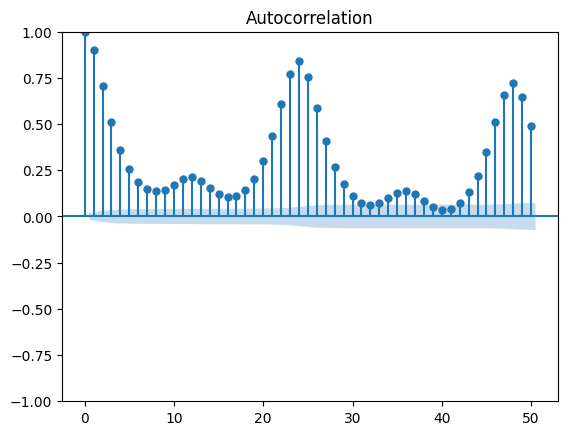

In [ ]:
plot_acf(df['MCP (Euro)'].dropna(), lags=50)
plt.show()

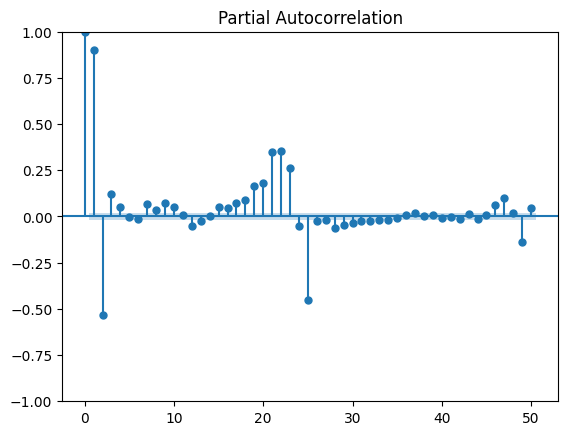

In [ ]:
plot_pacf(df['MCP (Euro)'].dropna(), lags=50)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
import torch
import numpy as np
import random

seed_value = 42

torch.manual_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [ ]:
df = df[['MCP (Euro)', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'wpgt', 'pres','MCP_lag1', 'MCP_lag2', 'MCP_lag3', 'Trend', 'Seasonal', 'Residual',
 'year', 'hour', 'quarter', 'dayofyear', 'month', 'dayofweek']]
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,MCP_lag1,MCP_lag2,MCP_lag3,Trend,Seasonal,Residual,year,hour,quarter,dayofyear,month,dayofweek
0,54.998618,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,54.998618,56.178388,71.000894,79.468248,0.701691,0.986307,2023,12,2,152,6,3
1,54.998293,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,54.998618,54.998618,56.178388,79.495157,0.699185,0.989501,2023,13,2,152,6,3
2,54.998455,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,54.998293,54.998618,54.998618,79.530954,0.730721,0.946374,2023,14,2,152,6,3
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,54.998455,54.998293,54.998618,79.718375,0.806774,0.855149,2023,15,2,152,6,3
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,54.998618,54.998455,54.998293,79.938611,0.934643,0.736133,2023,16,2,152,6,3


In [ ]:
X,y = df['MCP (Euro)'], df['MCP (Euro)']

X_train = X[:10000]
X_test = X[10000:]

y_train = y[:10000]
y_test = y[10000:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000,), (957,), (10000,), (957,))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
def SMA(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

def EMA(data, window_size):
    return data['Close'].ewm(span=window_size).mean()

def MACD(data, short_window, long_window):
    short_EMA = EMA(data, short_window)
    long_EMA = EMA(data, long_window)
    return short_EMA - long_EMA

def RSI(data, window_size):
    delta = data['Close'].diff()
    delta = delta[1:]
    up = delta.clip(lower=0)
    down = -1*delta.clip(upper=0)
    ema_up = up.ewm(com=window_size-1 , min_periods=window_size).mean()
    ema_down = down.ewm(com=window_size-1 , min_periods=window_size).mean()
    return ema_up/ema_down

def Bollinger_Bands(data, window_size):
    middle_band = SMA(data, window_size)
    std_dev = data['Close'].rolling(window=window_size).std()
    upper_band = middle_band + (std_dev*2)
    lower_band = middle_band - (std_dev*2)
    return upper_band, lower_band

In [ ]:
def check_stationarity(series):
    # Thanks to https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(df['MCP (Euro)'])

ADF Statistic: -7.781966
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE): 1393.66
Root Mean Squared Error (RMSE): 37.33
Mean Absolute Error (MAE): 18.91


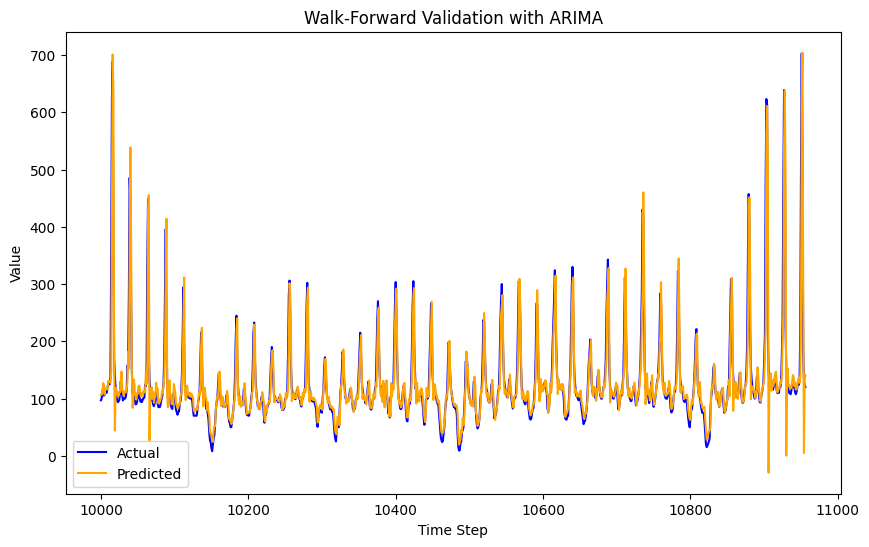

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

order = (3, 1, 3)  # (p, d, q)

model = ARIMA(y_train, order=order)
model_fit = model.fit()

predictions = []
history = list(y_train)

y_test = y_test.reset_index(drop=True)

for t in range(len(y_test)):
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast)
    history.append(y_test.iloc[t])
    model = ARIMA(history, order=order)
    model_fit = model.fit()

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Actual", color="blue")
plt.plot(range(len(y_train), len(y_train) + len(y_test)), predictions, label="Predicted", color="orange")
plt.title("Walk-Forward Validation with ARIMA")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()

<ipython-input-24-6beb80fb289c>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill').fillna(0)
<ipython-input-24-6beb80fb289c>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill').fillna(0)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Co

Mean Squared Error (MSE): 1236.13
Root Mean Squared Error (RMSE): 35.16
Mean Absolute Error (MAE): 26.30


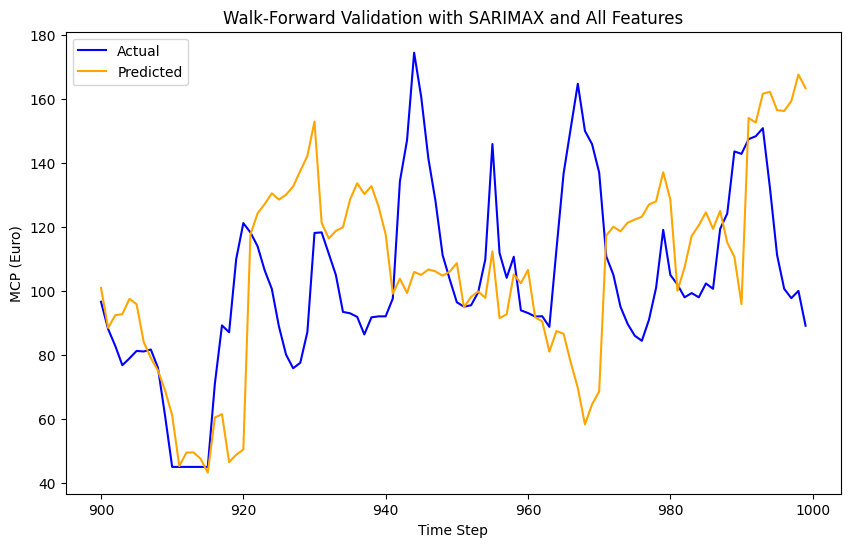

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

y = df['MCP (Euro)'][:1000]
X = df.drop(columns=['MCP (Euro)'])
X = X[:1000]
train_size = 900

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.fillna(method='ffill').fillna(0)
X_test = X_test.fillna(method='ffill').fillna(0)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

order = (3, 1, 3)  # (p, d, q)
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, s)

history_y = list(y_train)
history_X = X_train.values.tolist()
predictions = []

model = SARIMAX(history_y, order=order, seasonal_order=seasonal_order, exog=np.array(history_X))
model_fit = model.fit(disp=False)

for t in range(len(y_test)):
    exog_forecast = X_test.iloc[t:t+1].values
    forecast = model_fit.forecast(steps=1, exog=exog_forecast)
    predictions.append(forecast[0])

    history_y.append(y_test.iloc[t])
    history_X.append(X_test.iloc[t].values)

    if t % 10 == 0:
      model = SARIMAX(history_y, order=order, seasonal_order=seasonal_order, exog=np.array(history_X))
      model_fit = model.fit(disp=False)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Actual", color="blue")
plt.plot(range(len(y_train), len(y_train) + len(y_test)), predictions, label="Predicted", color="orange")
plt.title("Walk-Forward Validation with SARIMAX and All Features")
plt.xlabel("Time Step")
plt.ylabel("MCP (Euro)")
plt.legend()
plt.show()
